Predicting Insurance Premiums

In [566]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

In [567]:
df = pd.read_csv('train.csv')

In [568]:
df.sample(10)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
783165,783165,57.0,Male,27881.0,Married,0.0,Master's,NaN,32.844133,Rural,...,NaN,3.0,694.0,9.0,2019-10-14 15:21:39.202448,Poor,No,Monthly,Condo,1233.0
84098,84098,28.0,Female,136975.0,Divorced,4.0,PhD,NaN,18.915827,Suburban,...,0.0,15.0,339.0,6.0,2022-06-03 15:21:39.151732,Good,Yes,Weekly,Condo,1048.0
691349,691349,26.0,Female,20197.0,Married,2.0,Master's,NaN,22.138907,Suburban,...,NaN,1.0,479.0,1.0,2023-12-07 15:21:39.187211,Good,No,Rarely,Apartment,2294.0
498088,498088,30.0,Female,10434.0,Married,NaN,PhD,Self-Employed,15.079548,Urban,...,3.0,3.0,465.0,5.0,2022-05-13 15:21:39.208842,Good,No,Daily,Apartment,894.0
1160013,1160013,64.0,Female,33568.0,Single,4.0,High School,NaN,19.491015,Rural,...,1.0,10.0,371.0,5.0,2023-06-24 15:21:39.121169,NaN,No,Rarely,House,1198.0
445866,445866,46.0,Female,29171.0,Single,3.0,High School,Employed,22.369999,Suburban,...,2.0,1.0,552.0,8.0,2021-09-12 15:21:39.092127,Poor,No,Weekly,Apartment,238.0
515154,515154,54.0,Female,1448.0,Divorced,1.0,Bachelor's,Self-Employed,11.484620,Rural,...,NaN,19.0,NaN,9.0,2022-07-10 15:21:39.123711,Average,No,Monthly,House,3068.0
562622,562622,40.0,Male,16962.0,Single,NaN,High School,Employed,24.847287,Rural,...,0.0,11.0,661.0,9.0,2020-03-08 15:21:39.170099,Average,Yes,Monthly,House,933.0
924714,924714,40.0,Male,16094.0,Single,3.0,Bachelor's,Unemployed,NaN,Rural,...,NaN,7.0,591.0,3.0,2022-04-01 15:21:39.091080,Good,No,Rarely,Apartment,1887.0
951740,951740,51.0,Female,17059.0,Divorced,NaN,PhD,Unemployed,7.263003,Rural,...,0.0,1.0,592.0,7.0,2023-09-19 15:21:39.237118,Poor,Yes,Rarely,Condo,981.0


In [569]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [570]:
df.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.200000e+06,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,5.999995e+05,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,3.464103e+05,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,2.999998e+05,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,5.999995e+05,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,8.999992e+05,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,1.199999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [571]:
(df.isnull().sum() / len(df)) * 100

id                       0.000000
Age                      1.558750
Gender                   0.000000
Annual Income            3.745750
Marital Status           1.544083
Number of Dependents     9.139333
Education Level          0.000000
Occupation              29.839583
Health Score             6.173000
Location                 0.000000
Policy Type              0.000000
Previous Claims         30.335750
Vehicle Age              0.000500
Credit Score            11.490167
Insurance Duration       0.000083
Policy Start Date        0.000000
Customer Feedback        6.485333
Smoking Status           0.000000
Exercise Frequency       0.000000
Property Type            0.000000
Premium Amount           0.000000
dtype: float64

In [572]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(exclude=['object']).columns

In [573]:
cat_cols

Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Policy Start Date', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type'],
      dtype='object')

In [574]:
for i in df[cat_cols]:
    print(df[i].value_counts())
    print(f" null values = {df[i].isnull().sum()}")
    per_null = df[i].isnull().sum() / len(df) * 100
    print(f" percentage of null values = {per_null:.2f}%")
    print()

Gender
Male      602571
Female    597429
Name: count, dtype: int64
 null values = 0
 percentage of null values = 0.00%

Marital Status
Single      395391
Married     394316
Divorced    391764
Name: count, dtype: int64
 null values = 18529
 percentage of null values = 1.54%

Education Level
Master's       303818
PhD            303507
Bachelor's     303234
High School    289441
Name: count, dtype: int64
 null values = 0
 percentage of null values = 0.00%

Occupation
Employed         282750
Self-Employed    282645
Unemployed       276530
Name: count, dtype: int64
 null values = 358075
 percentage of null values = 29.84%

Location
Suburban    401542
Rural       400947
Urban       397511
Name: count, dtype: int64
 null values = 0
 percentage of null values = 0.00%

Policy Type
Premium          401846
Comprehensive    399600
Basic            398554
Name: count, dtype: int64
 null values = 0
 percentage of null values = 0.00%

Policy Start Date
2020-02-08 15:21:39.134960    142
2022-02-02 15:

In [575]:
num_cols

Index(['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Premium Amount'],
      dtype='object')

In [576]:
for i in df[num_cols]:
    print(df[i].value_counts())
    print(f" null values = {df[i].isnull().sum()}")
    per_null = df[i].isnull().sum() / len(df) * 100
    print(f" percentage of null values = {per_null:.2f}%")
    print()

id
0          1
1          1
2          1
3          1
4          1
          ..
1199995    1
1199996    1
1199997    1
1199998    1
1199999    1
Name: count, Length: 1200000, dtype: int64
 null values = 0
 percentage of null values = 0.00%

Age
53.0    26354
61.0    26218
39.0    26042
64.0    25990
57.0    25971
43.0    25966
62.0    25849
46.0    25756
33.0    25728
47.0    25709
44.0    25642
34.0    25615
58.0    25544
31.0    25500
56.0    25450
32.0    25435
54.0    25370
38.0    25346
36.0    25340
35.0    25323
22.0    25309
59.0    25173
37.0    25163
51.0    25162
55.0    25132
49.0    25107
45.0    25101
20.0    25055
21.0    24987
50.0    24943
40.0    24877
48.0    24834
26.0    24805
24.0    24690
30.0    24683
29.0    24673
19.0    24641
42.0    24626
60.0    24593
52.0    24592
18.0    24488
28.0    24455
63.0    24283
25.0    24221
27.0    24212
41.0    24117
23.0    23225
Name: count, dtype: int64
 null values = 18705
 percentage of null values = 1.56%

Annual Income

In [577]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [578]:
df['Annual Income'] = df['Annual Income'].fillna(df['Annual Income'].median())

In [579]:
df['Number of Dependents'] = df['Number of Dependents'].fillna(df['Number of Dependents'].mode()[0])
df['Health Score'] = df['Health Score'].fillna(df['Health Score'].mode()[0])
df['Previous Claims'] = df['Previous Claims'].fillna(df['Previous Claims'].mode()[0])
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].mode()[0])

In [580]:
df['Insurance Duration'] = df['Insurance Duration'].fillna(0)

In [581]:
(df[num_cols].isnull().sum() / len(df)) * 100

id                      0.0000
Age                     0.0000
Annual Income           0.0000
Number of Dependents    0.0000
Health Score            0.0000
Previous Claims         0.0000
Vehicle Age             0.0005
Credit Score            0.0000
Insurance Duration      0.0000
Premium Amount          0.0000
dtype: float64

In [582]:
for i in num_cols:
    print(f"{i}: {df[i].skew()}")

id: 0.0
Age: -0.012630745135908209
Annual Income: 1.522953747839693
Number of Dependents: -0.17620743306681902
Health Score: 0.36734901606920983
Previous Claims: 1.3551883753731382
Vehicle Age: -0.020408882291730098
Credit Score: 0.12971393463890993
Insurance Duration: -0.008794460108708057
Premium Amount: 1.2409154932891029


In [583]:
skew_cols = []
for col in num_cols:
    if df[col].skew() > 0.5 or df[col].skew() < -0.5:
        skew_cols.append(col)
print(skew_cols)

['Annual Income', 'Previous Claims', 'Premium Amount']


In [584]:
skew_cols.remove('Premium Amount')

In [585]:
skew_cols

['Annual Income', 'Previous Claims']

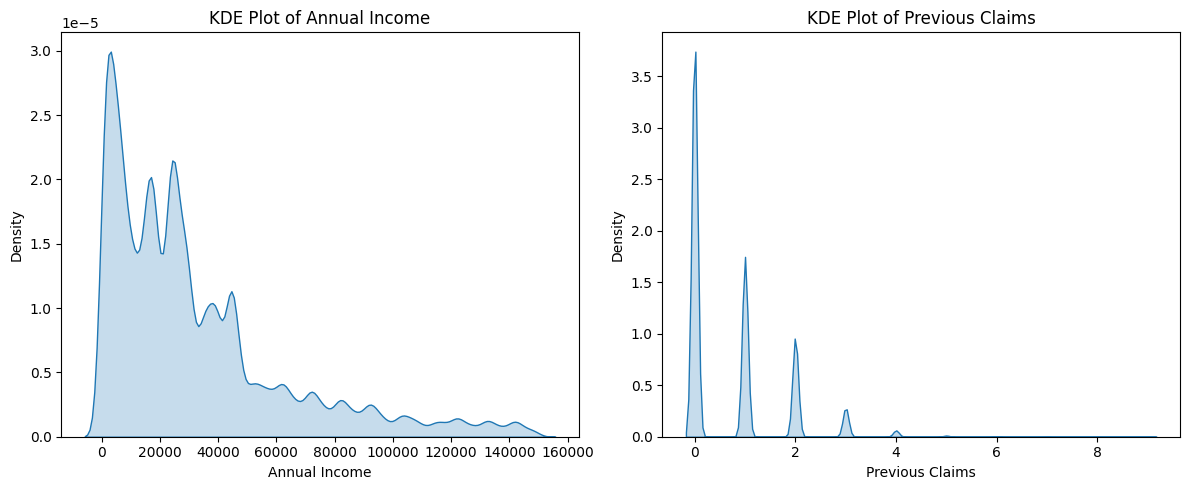

In [586]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.kdeplot(df['Annual Income'], ax=axes[0], fill=True)
axes[0].set_title("KDE Plot of Annual Income")
sns.kdeplot(df['Previous Claims'], ax=axes[1], fill=True)
axes[1].set_title("KDE Plot of Previous Claims")
plt.tight_layout()
plt.show()

In [587]:
df['Previous Claims'] = np.sqrt(df['Previous Claims'])

In [588]:
from scipy.stats import boxcox
df['Annual Income'], _ = boxcox(df['Annual Income'])

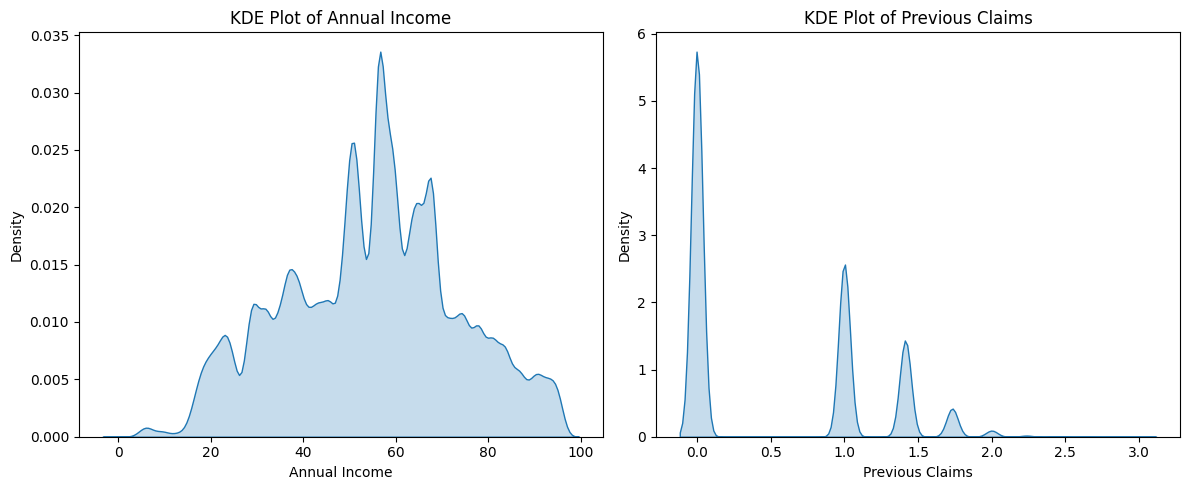

In [589]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.kdeplot(df['Annual Income'], ax=axes[0], fill=True)
axes[0].set_title("KDE Plot of Annual Income")
sns.kdeplot(df['Previous Claims'], ax=axes[1], fill=True)
axes[1].set_title("KDE Plot of Previous Claims")
plt.tight_layout()
plt.show()

In [590]:
df['Annual Income'].skew(), df['Previous Claims'].skew()

(np.float64(-0.0718486418044403), np.float64(0.5253518887306795))

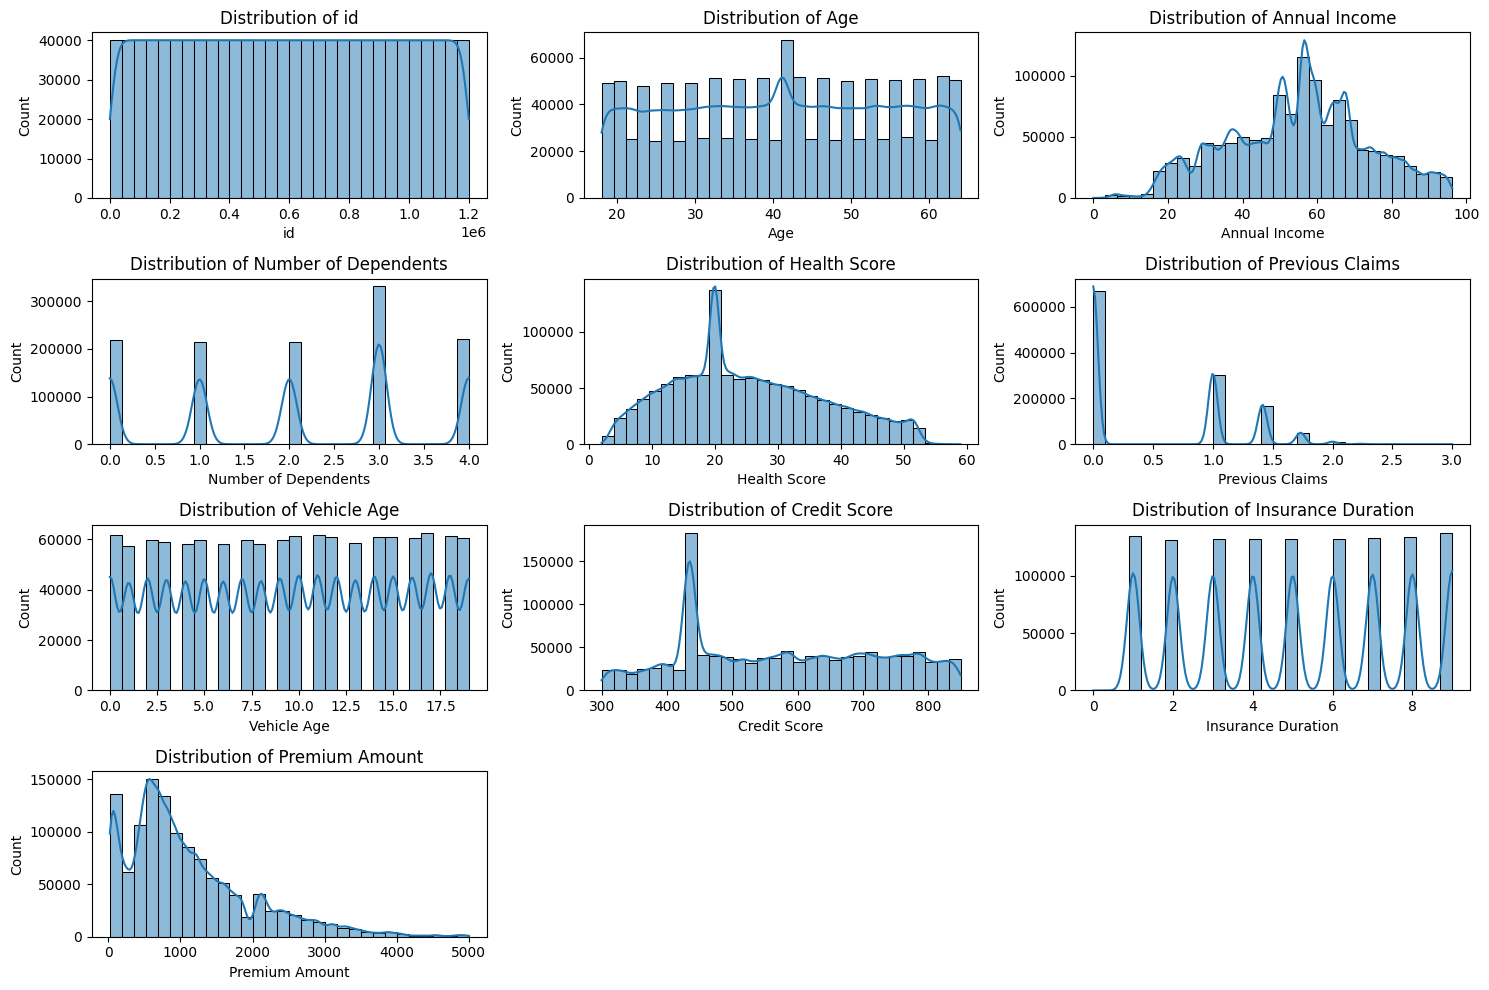

In [591]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot((len(num_cols) + 2) // 3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()